In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [43]:
# 1. Aquisição e leitura dos dados
data = pd.read_csv('vinhos.csv')

In [44]:
data

,acidez_fixa,acidez_volatil,acido_citrico,concentracao_residual_acucar,cloretos,dioxido_de_enxofre_livre,dioxido_de_enxofre_total,densidade,pH,sulfatos,alcool,qualidade,tipo
0,8.9,0.745,0.18,2.5,0.077,15.0,48.0,0.99739,3.20,0.47,9.7,6,tinto
1,7.5,0.520,0.42,2.3,0.087,8.0,38.0,0.99720,3.58,0.61,10.5,6,tinto
2,8.3,0.300,0.49,3.8,0.090,11.0,24.0,0.99498,3.27,0.64,12.1,7,tinto
3,7.8,0.910,0.07,1.9,0.058,22.0,47.0,0.99525,3.51,0.43,10.7,6,tinto
4,7.2,0.340,0.32,2.5,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5,tinto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,6.6,0.310,0.07,1.5,0.033,55.0,144.0,0.99208,3.16,0.42,10.0,5,branco
2996,6.2,0.240,0.27,2.9,0.039,30.0,123.0,0.98959,3.12,0.37,12.8,6,branco
2997,5.1,0.350,0.26,6.8,0.034,36.0,120.0,0.99188,3.38,0.40,11.5,6,branco
2998,8.0,0.450,0.28,10.8,0.051,25.0,157.0,0.99570,3.06,0.47,11.4,7,branco


In [45]:
# 2. Análise exploratória
# Examine as principais características da base de dados, como estatísticas descritivas e gráficos.

# 3. Preparação dos dados
# Escolha uma das atividades de classificação (a ou b) e prepare os dados de acordo.

# a. Classificação de vinho do tipo 'tinto' ou 'branco'
# Selecione as features relevantes e os rótulos (tinto ou branco).

# Ou

# b. Classificação entre os vinhos com qualidade superior ou inferior a 6
# Defina os critérios para "qualidade superior" e "inferior" e crie os rótulos correspondentes.

In [46]:
desc_stats = data.describe()

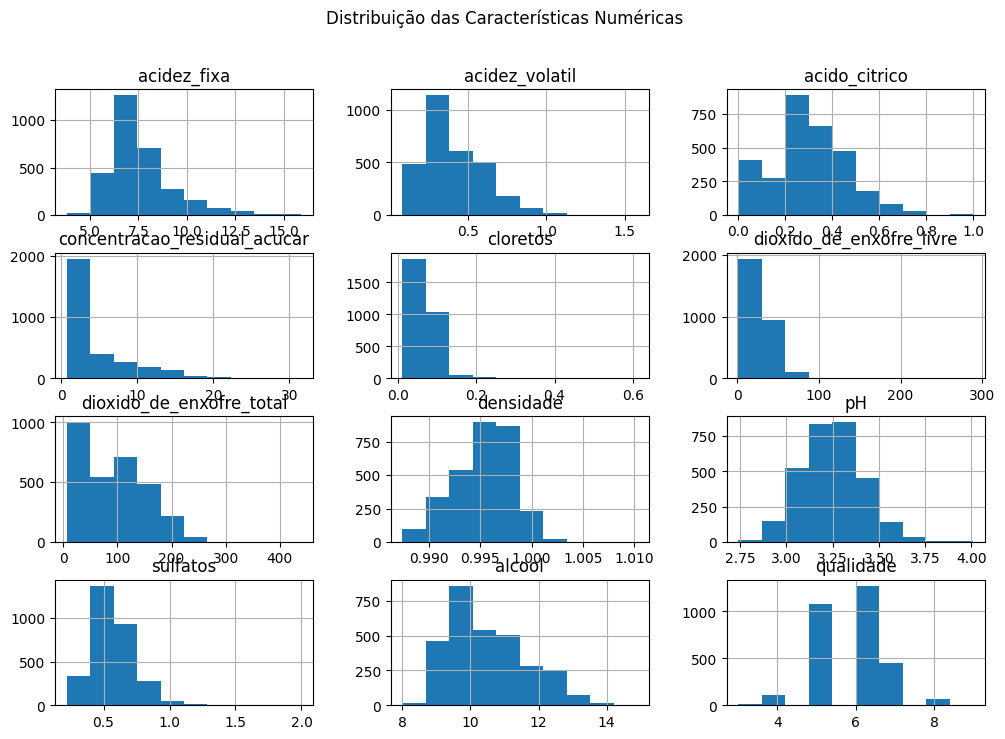

In [47]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.hist(figsize=(12, 8))
plt.suptitle("Distribuição das Características Numéricas")
plt.show()

In [48]:
sns.pairplot(data=numeric_features)
plt.suptitle("Relações entre Características Numéricas")
plt.show()

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

In [ ]:
categorical_features = data.select_dtypes(exclude=[np.number])
for column in categorical_features.columns:
    if isinstance(data[column].dtype, pd.CategoricalDtype):
        sns.countplot(x=column, data=data, palette="Set3")
        plt.title(f"Contagem de {column}")
        plt.xticks(rotation=45)
        plt.show()

In [41]:
data['tipo'] = data['tipo'].apply(lambda x: 1 if x == 'tinto' else 0)

,acidez_fixa,acidez_volatil,acido_citrico,concentracao_residual_acucar,cloretos,dioxido_de_enxofre_livre,dioxido_de_enxofre_total,densidade,pH,sulfatos,alcool,qualidade,tipo
0,8.9,0.745,0.18,2.5,0.077,15.0,48.0,0.99739,3.20,0.47,9.7,6,0
1,7.5,0.520,0.42,2.3,0.087,8.0,38.0,0.99720,3.58,0.61,10.5,6,0
2,8.3,0.300,0.49,3.8,0.090,11.0,24.0,0.99498,3.27,0.64,12.1,7,0
3,7.8,0.910,0.07,1.9,0.058,22.0,47.0,0.99525,3.51,0.43,10.7,6,0
4,7.2,0.340,0.32,2.5,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,6.6,0.310,0.07,1.5,0.033,55.0,144.0,0.99208,3.16,0.42,10.0,5,0
2996,6.2,0.240,0.27,2.9,0.039,30.0,123.0,0.98959,3.12,0.37,12.8,6,0
2997,5.1,0.350,0.26,6.8,0.034,36.0,120.0,0.99188,3.38,0.40,11.5,6,0
2998,8.0,0.450,0.28,10.8,0.051,25.0,157.0,0.99570,3.06,0.47,11.4,7,0
